## Bubble plot, using scatter plot panels to visualize result from pathway analysis

One can include multiple panels, and customize size, colors of scatters.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# these use mummichog output pathway .tsv files
# more files can be used
INDIR = "../inputdata/"
input_files = ['mcg_pathwayanalysis_A.tsv', 'mcg_pathwayanalysis_B.tsv' ]

[0.92790713095172228, 1.0413561944231713, 1.0445791738300669, 1.0445791738300669, 1.0445791738300669, 1.1311007830435784, 1.1757629527667233, 1.289542244951507, 1.3047314435519113, 1.3748797380483697]
[3.0975059479977372, 2.1869221771157168, 1.0590604583847831, 2.9939513376770353, 0, 1.4655471617108637, 2.7852157391243377, 1.6082068795479776, 2.9235601862855152, 3.1669594021441387]


/Users/sli/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:51: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


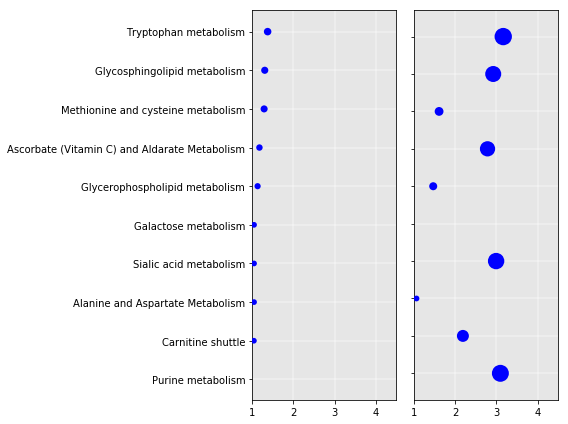

In [8]:
# read pathway analysis result from mummichog
def get_data(f):
    '''
    Input data: pathway    overlap_size    pathway_size    p-value
    '''
    mydict = {}
    w = open(f).read().splitlines()
    # first 50 lines are usually enough; extra lines may exist in the pathway export table
    for line in w[1: 50]:
        a = line.split('\t')
        mydict[a[0]] = -np.log10(float(a[3]))  # a[4] if mummichog v1 result

    return mydict

# read data
mydata = []
for ff in input_files: mydata.append( get_data(INDIR + ff) )

# manualy input pathway list. 
#Edit below for different set/order of pathways
selected_pathways = '''Tryptophan metabolism
Glycosphingolipid metabolism
Methionine and cysteine metabolism
Ascorbate (Vitamin C) and Aldarate Metabolism
Glycerophospholipid metabolism
Galactose metabolism
Sialic acid metabolism
Alanine and Aspartate Metabolism
Carnitine shuttle
Purine metabolism'''
selected_pathways = [x.strip() for x in selected_pathways.splitlines()]
selected_pathways.reverse()

# plot
fig, myaxes = plt.subplots(figsize=(8, 6), nrows=1, ncols=2)
Y = range( len(selected_pathways) )

#
# plt.yticks(range(len(selected_pathways)), selected_pathways)

for ii in range(2):

    X = [mydata[ii].get(path, 0) for path in selected_pathways]
    print(X)
    myaxes[ii].set_xlim( 1, 4.5 )
    myaxes[ii].set_xticks(range(1, 5))
    myaxes[ii].set_yticks(range(len(selected_pathways)))
    myaxes[ii].set_yticklabels([]*len(selected_pathways))
    #myaxes[ii].set_ylim( 0, 0.5+len(selected_pathways))
    myaxes[ii].grid(True, color='w', linestyle='-', linewidth=2, alpha=0.3, zorder=0)
    myaxes[ii].set_axis_bgcolor('0.9')
    # change styles below. s stands for size of dots
    myaxes[ii].scatter( X, Y, s=[30*x**2 for x in X], c='blue', linewidths =0, alpha=1, zorder=3)


myaxes[0].set_yticklabels(selected_pathways)

plt.tight_layout()
plt.show()
# comment out the last line and use this line to save file
# plt.savefig('good-bubbles-.pdf')